In [70]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [71]:
df = pd.read_csv("SimTodActData.csv")
df = df.drop("Unnamed: 0", 1)
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})

In [67]:
df.head()

,subject,activity,raw acc data,magnitude,max,min,std,skew,kurtosis,mean,...,z skew,x kurtosis,y kurtosis,z kurtosis,x std,y std,z std,xy mean,yz mean,xz mean
0,gia,walking,"[[-9.8000000000000007, 0.29999999999999999, -1...","[9.918669265581952, 9.918669265581952, 9.91866...",19.460987,5.989157,2.138958,1.445576,3.793923,10.182836,...,-1.627314,2.253049,2.302408,4.502332,1.999532,1.984068,1.626193,-3.132645,-0.631162,20.944970
1,gia,walking,"[[-10.199999999999999, -5.5999999999999996, -6...","[13.528118864054973, 13.528118864054973, 10.09...",22.588935,6.953416,3.033713,1.752123,3.306845,10.548465,...,-0.872465,2.731893,1.201899,0.519213,2.742992,2.759952,2.067458,-1.707415,0.203607,25.377635
2,gia,walking,"[[-11.1, 0.90000000000000002, -1.5], [-9.59999...","[11.236992480196825, 9.689685237405806, 9.6896...",21.328150,6.024118,2.440292,1.649754,4.167502,10.369328,...,-0.839806,1.010846,1.483274,0.460889,2.311682,2.356913,1.980663,-1.278758,-0.738257,24.078898
3,gia,walking,"[[-9.1999999999999993, 0.80000000000000004, -2...","[9.470480452437457, 9.022749026765624, 9.02274...",20.667608,6.041523,2.709005,1.171656,1.464126,10.482501,...,-0.814940,0.401497,2.833225,0.329225,2.379929,2.786271,2.122226,-2.839178,-0.854489,23.962806
4,gia,walking,"[[-8.0999999999999996, -4.2000000000000002, -4...","[10.218121158021175, 10.218121158021175, 10.21...",18.157643,6.071244,2.444689,1.042117,0.875984,10.402893,...,-0.715887,0.851138,1.599907,0.239431,2.302092,2.508782,1.868072,-3.855110,-1.159058,24.132285


In [72]:
Y = df['activity']
features = ['max', 'min', 'std', 'skew', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x std', 'y std', 'z std',  'xy mean', 'yz mean', 'xz mean']
X = df[features]
groups = df.subject.unique()

In [73]:
a = []
print(len(groups))
for g in groups: 
    print(g)
    test = df.loc[(df.subject == g)]
    X_test = test[features]
    y_test = test['activity']
    print(test.shape)
    train = df.loc[(df.subject != g)]
    print(train.shape)
    X_train = train[features]
    y_train = train['activity']
    pram = grid(X_test,y_test,X_train,y_train)
    a.append(run(pram,X_train,y_train,X_test,y_test))
avg = np.array(a)
print(np.mean(avg))    
    


6
gia
(57, 35)
(287, 35)


C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9473684210526315

Best parameters for  Random Forest  found on development set: {'n_estimators': 30}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.912 (+/-0.149) for {'n_estimators': 10}
0.930 (+/-0.160) for {'n_estimators': 20}
0.947 (+/-0.113) for {'n_estimators': 30}
0.877 (+/-0.143) for {'n_estimators': 40}
0.930 (+/-0.158) for {'n_estimators': 50}
0.912 (+/-0.187) for {'n_estimators': 60}
0.912 (+/-0.149) for {'n_estimators': 70}
0.912 (+/-0.187) for {'n_estimators': 80}
0.912 (+/-0.187) for {'n_estimators': 90}
0.912 (+/

C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9642857142857143

Best parameters for  Random Forest  found on development set: {'n_estimators': 40}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.911 (+/-0.149) for {'n_estimators': 10}
0.929 (+/-0.158) for {'n_estimators': 20}
0.946 (+/-0.113) for {'n_estimators': 30}
0.964 (+/-0.079) for {'n_estimators': 40}
0.946 (+/-0.113) for {'n_estimators': 50}
0.946 (+/-0.113) for {'n_estimators': 60}
0.964 (+/-0.079) for {'n_estimators': 70}
0.964 (+/-0.079) for {'n_estimators': 80}
0.964 (+/-0.079) for {'n_estimators': 90}
0.946 (+/

C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9491525423728814

Best parameters for  Random Forest  found on development set: {'n_estimators': 30}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.932 (+/-0.111) for {'n_estimators': 10}
0.932 (+/-0.152) for {'n_estimators': 20}
0.949 (+/-0.117) for {'n_estimators': 30}
0.932 (+/-0.152) for {'n_estimators': 40}
0.949 (+/-0.117) for {'n_estimators': 50}
0.949 (+/-0.117) for {'n_estimators': 60}
0.932 (+/-0.152) for {'n_estimators': 70}
0.932 (+/-0.152) for {'n_estimators': 80}
0.932 (+/-0.152) for {'n_estimators': 90}
0.932 (+/

C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9649122807017544

Best parameters for  Random Forest  found on development set: {'n_estimators': 10}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.965 (+/-0.114) for {'n_estimators': 10}
0.947 (+/-0.171) for {'n_estimators': 20}
0.947 (+/-0.171) for {'n_estimators': 30}
0.947 (+/-0.171) for {'n_estimators': 40}
0.930 (+/-0.169) for {'n_estimators': 50}
0.947 (+/-0.171) for {'n_estimators': 60}
0.930 (+/-0.169) for {'n_estimators': 70}
0.947 (+/-0.119) for {'n_estimators': 80}
0.930 (+/-0.169) for {'n_estimators': 90}
0.930 (+/

C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.9454545454545454

Best parameters for  Random Forest  found on development set: {'n_estimators': 20}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.927 (+/-0.170) for {'n_estimators': 10}
0.945 (+/-0.171) for {'n_estimators': 20}
0.945 (+/-0.171) for {'n_estimators': 30}
0.945 (+/-0.171) for {'n_estimators': 40}
0.945 (+/-0.171) for {'n_estimators': 50}
0.945 (+/-0.171) for {'n_estimators': 60}
0.945 (+/-0.171) for {'n_estimators': 70}
0.945 (+/-0.171) for {'n_estimators': 80}
0.945 (+/-0.171) for {'n_estimators': 90}
0.945 (+/

C:\Users\dsaffo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:552: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Random Forest : 
Best score for  Random Forest : 0.95

Best parameters for  Random Forest  found on development set: {'n_estimators': 50}

Best estimator for  Random Forest  model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


Grid scores on development set:

0.900 (+/-0.029) for {'n_estimators': 10}
0.917 (+/-0.153) for {'n_estimators': 20}
0.933 (+/-0.106) for {'n_estimators': 30}
0.900 (+/-0.129) for {'n_estimators': 40}
0.950 (+/-0.086) for {'n_estimators': 50}
0.950 (+/-0.086) for {'n_estimators': 60}
0.933 (+/-0.147) for {'n_estimators': 70}
0.900 (+/-0.129) for {'n_estimators': 80}
0.933 (+/-0.147) for {'n_estimators': 90}
0.917 (+/-0.153) for {'

Feature ranking:
feature (1, 'max', 0.078901425602564995)
feature (2, 'min', 0.076532763662649592)
feature (3, 'std', 0.061175561473363546)
feature (4, 'skew', 0.060625948144812432)
feature (5, 'mean', 0.05826012107319424)
feature (6, 'median', 0.058239045082879387)
feature (7, 'x max', 0.049031279699890511)
feature (8, 'y max', 0.047190309224831667)
feature (9, 'z max', 0.046231657277976471)
feature (10, 'x min', 0.045700830903882272)
feature (11, 'y min', 0.045188604904848446)
feature (12, 'z min', 0.044952042709340549)
feature (13, 'x mean', 0.039940993891702914)
feature (14, 'y mean', 0.034882259203867824)
feature (15, 'z mean', 0.030717380056017832)
feature (16, 'x median', 0.030281202661035803)
feature (17, 'y median', 0.024662927413629264)
feature (18, 'z median', 0.023442600730978255)
feature (19, 'x skew', 0.020864464095901758)
feature (20, 'y skew', 0.020807173730349338)
feature (21, 'z skew', 0.017444628336961362)
feature (22, 'x std', 0.017162192913732659)
feature (23, 'y s

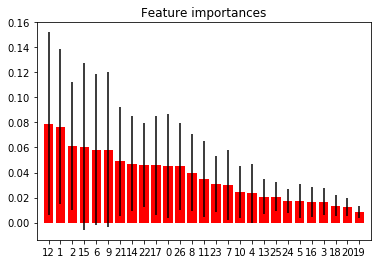

In [6]:
# features analysis
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

X = X_train
Y = y_train

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("feature" , (f + 1, features[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

[0.7357357357357357, 29]


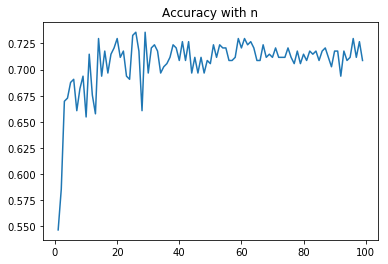

In [7]:
nResult= []
for n in range(1, 100,1):
    model = RandomForestClassifier(n_estimators = n)
    model.fit(X_train, y_train)

    expected = y_test
    predicted = model.predict(X_test)
    acc = accuracy_score(expected, predicted)


    nResult.append([acc,n])
print(max(nResult))
#plotting peak k value preformance 
nResult = pd.DataFrame(nResult, columns=["n", "acc"])
plt.plot(nResult.acc, nResult.n)
plt.title("Accuracy with n")
plt.show()

In [8]:
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [9]:
expected = y_test
predicted = model.predict(X_test)

In [10]:
print("Classification Report:")
print(metrics.classification_report(expected, predicted))

Classification Report:
             precision    recall  f1-score   support

   climbing       0.83      0.50      0.62        20
    running       0.63      0.98      0.77        61
    sitting       0.56      0.90      0.69        62
   sleeping       0.99      0.94      0.96        70
   standing       0.70      0.26      0.38        61
    walking       0.69      0.42      0.53        59

avg / total       0.73      0.70      0.67       333



Confusion matrix


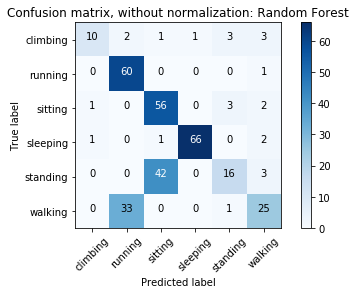

In [11]:
class_names = ["climbing", "running", "sitting", "sleeping", "standing", "walking"]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(expected, predicted)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization: Random Forest')

plt.show()

In [40]:
def grid(X_train,y_train,X_test,y_test):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    models = [#[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
    #                                            'min_samples_leaf': [1, 5, 10, 15, 20],#     v
    #                                            'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              ]

    # models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

    # models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    #models.append([svm.SVC(kernel='rbf', class_weight={1:10,9:1}), {#'kernel': ['rbf'], # class_weight="balanced"; tol
                              # 'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               #'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])
    #models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])





    models.append([RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                               }, "Random Forest"])

    models_with_best_params = []

    # cross-validation strategy
    cv = 10 # for 10-folds cross-validation

    # Leave One Group Out
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)


    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = 5)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        print(model[2], ": ")
        print("Best score for ", model[2], ":", clf.best_score_)
        print()
        print("Best parameters for ", model[2], " found on development set:", best_params)
        print()
        print("Best estimator for ", model[2], " model:", best_estimator)
        print()
        print()

        print("Grid scores on development set:")
        print()
        for params, mean_score, scores in clf.grid_scores_:
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean_score, scores.std() * 2, params))
        print()

    print(models_with_best_params)
    
    return best_params['n_estimators']

In [42]:
def run(pram, X_train, y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators=pram)
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
    
    return metrics.accuracy_score(expected,predicted)